### **Why Does L2 Regularization (Weight Decay) Help Prevent Overfitting?**  

L2 regularization, or **weight decay**, helps prevent overfitting by discouraging large weight values in a neural network. This is accomplished by adding a penalty term to the loss function that is proportional to the sum of the squared weights. The modified loss function looks like:

$$
\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{original}} + \lambda \sum_{i} w_i^2
$$

where:  
- $\mathcal{L}_{\text{original}}$  is the original loss (e.g., mean squared error or cross-entropy),  
- $w_i$ are the model's weights,  
- $\lambda$ (regularization strength) controls how much penalty is applied to large weights.

---

### **Why Does This Help?**
1. **Reduces Model Complexity (Encourages Simplicity)**
   - Large weights tend to make the model highly sensitive to small changes in input data, causing it to learn noise rather than general patterns.
   - By penalizing large weights, L2 regularization encourages smaller, more balanced weight values, leading to a smoother, more stable model.

2. **Prevents Overreliance on Specific Features**
   - Without regularization, a model may assign **very high weights to specific input features** that correlate strongly with the training data but might not generalize to unseen data.
   - Penalizing large weights forces the model to **spread influence across multiple features**, improving generalization.

3. **Smooths the Loss Landscape**
   - L2 regularization modifies the loss function so that the optimizer prefers solutions in which weights are smaller and gradients change more gradually.
   - This prevents the model from fitting sharp, complex decision boundaries that work well on training data but fail on test data.

4. **Acts as an Implicit Bayesian Prior**
   - Mathematically, L2 regularization can be interpreted as imposing a **Gaussian prior** on the weights in a Bayesian framework.
   - This means the model assumes that weights should be normally distributed around zero unless the data strongly suggests otherwise.

---

### **How Does It Affect Gradient Descent?**
During training with gradient descent, the weight update rule for L2 regularization is:

$$
w_i \leftarrow w_i - \eta \left( \frac{\partial \mathcal{L}_{\text{original}}}{\partial w_i} + 2\lambda w_i \right)
$$

where $\eta$ is the learning rate. The additional $2\lambda w_i$ term **shrinks the weights** at every step, naturally preventing them from growing too large.

---

### **Key Takeaways**
✅ **Prevents overfitting** by discouraging complex models with large weights.  
✅ **Encourages weight sparsity**, forcing the model to rely on multiple features instead of a few dominant ones.  
✅ **Smooths the loss landscape**, leading to more stable generalization.  
✅ **Works naturally with gradient descent**, applying a continuous decay to large weights.

By keeping weight values small and well-distributed, L2 regularization helps neural networks **learn patterns that generalize well to unseen data** rather than just memorizing training examples.

# Regularization example

Here, we use Ridge regression (includes L2 regularization) to fit a polynomial regression model. The penalty term helps to prevent the model from overfitting the training data by shrinking the coefficients of the polynomial features. This results in a smoother and more generalizable model (when we have limited data).

In [2]:
import numpy as np
from sklearn import linear_model, preprocessing, pipeline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

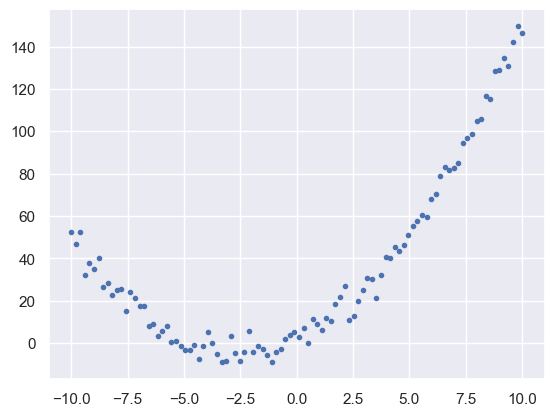

In [17]:
def create_data(n_points):
    x = np.linspace(-10, 10, n_points)
    y = x**2 + 5*x + 1 + 5* np.random.randn(n_points)
    return x, y
x, y = create_data(100)
plt.plot(x,y, '.')
plt.show()

### Explanation of the Two Models

#### Polynomial Regression without Regularization

The first model is a pipeline for polynomial regression without regularization. Here are the steps involved:

1. **Polynomial Features (degree=8)**: This step generates polynomial features of degree 8 from the input features. Polynomial features allow the model to capture non-linear relationships in the data.
2. **Standard Scaler**: This step standardizes the features by removing the mean and scaling to unit variance. Standardization is important for many machine learning algorithms to ensure that all features contribute equally to the model.
3. **Linear Regression**: This step fits a linear regression model to the standardized polynomial features. Linear regression finds the best-fitting line (or hyperplane) that minimizes the sum of squared errors between the predicted and actual values.

```python
model = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=8)),
    ('line', preprocessing.PolynomialFeatures(degree=1)),
    ('scaler', preprocessing.StandardScaler()),
    ('model', linear_model.LinearRegression())
])
```

#### Polynomial Regression with L2 Regularization (Ridge Regression)

The second model is a pipeline for polynomial regression with L2 regularization, also known as Ridge regression. Here are the steps involved:

1. **Polynomial Features (degree=8)**: This step generates polynomial features of degree 8 from the input features, similar to the first model.
2. **Standard Scaler**: This step standardizes the features by removing the mean and scaling to unit variance.
3. **Ridge Regression**: This step fits a Ridge regression model to the standardized polynomial features. *Ridge regression is a type of linear regression that includes an L2 penalty term* (controlled by the alpha parameter) to prevent overfitting by shrinking the coefficients of less important features.

```python
model_l2 = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=8)),
    ('line', preprocessing.PolynomialFeatures(degree=1)),
    ('scaler', preprocessing.StandardScaler()),
    ('model', linear_model.Ridge(alpha=1))
])
```

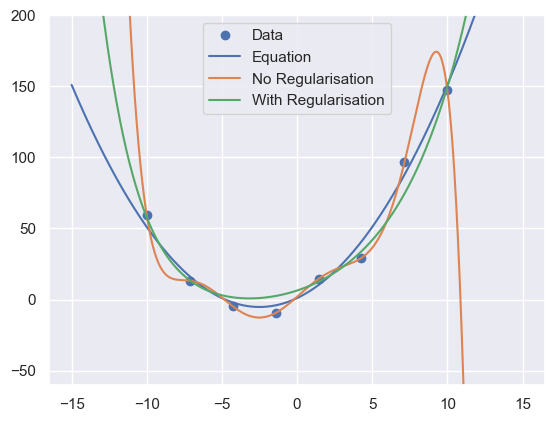

In [16]:
# Set the random seed for reproducibility
np.random.seed(1)

# Create a pipeline for polynomial regression without regularization
model = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=8)),  # Generate polynomial features of degree 8
    ('scaler', preprocessing.StandardScaler()),            # Standardize the features
    ('model', linear_model.LinearRegression())             # Linear regression model
])

# Create a pipeline for polynomial regression with L2 regularization (Ridge regression)
model_l2 = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=8)),  # Generate polynomial features of degree 8
    ('scaler', preprocessing.StandardScaler()),            # Standardize the features
    ('model', linear_model.Ridge(alpha=1))                 # Ridge regression model with alpha=1
])

# Generate a small dataset with 8 points
x, y = create_data(8)

# Fit the models to the data
model.fit(x.reshape(-1,1), y.reshape(-1,1))
model_l2.fit(x.reshape(-1,1), y.reshape(-1,1))

# Create test data for predictions
x_pred = np.linspace(-15, 15, 1000).reshape(-1, 1)

# Predict using the models
y_pred = model.predict(x_pred)
y_pred_l2 = model_l2.predict(x_pred)

# Plot the original data points
plt.plot(x, y, 'o', label='Data')

# Plot the true quadratic equation
plt.plot(x_pred, x_pred**2 + 5*x_pred + 1, label='Equation', color='b')

# Plot the predictions from the model without regularization
plt.plot(x_pred, y_pred, label='No Regularisation')

# Plot the predictions from the model with regularization
plt.plot(x_pred, y_pred_l2, label='With Regularisation')

# Set the y-axis limits for better visualization
plt.ylim(-60, 200)

# Add a legend to the plot
plt.legend()
